In [2]:
#importing the needed libraries
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

In [15]:
#loading the data
data = loadmat('ex3data1.mat')

x_data = data['X']
y_data = data['y']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, train_size=0.8)

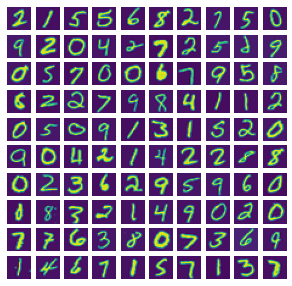

In [16]:
#data visualisation
fig, axis = plt.subplots(10,10,figsize=(5,5))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(x_data[np.random.randint(0,5001)].reshape(20,20,order="F")) #reshape back to 20 pixel by 20 pixel
        axis[i,j].axis("off")

In [276]:
#reshape x_data to be a (m, 401) shaped matrix
x_train = np.hstack((np.ones((len(x_train), 1)), x_train))

In [277]:
#creating some utility functions
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def h(x_data, theta):
  return sigmoid(np.dot(x_data, theta))

#creating the cost function
def cost_function(x_data, y_data, theta, Lambda):
  first_half = -y_data * np.log(h(x_data, theta))
  second_half = -(1 - y_data) * np.log(1 - h(x_data, theta))
  third_half = (Lambda / (2 * len(x_data))) * (np.vstack((np.array([0]), theta[1:])) ** 2).sum()
  err = first_half + second_half + third_half

  return err.sum() / len(x_data)

#creating the gradient descent function
def gradient_descent(x_data, y_data, theta, learning_rate, Lambda):
  err = h(x_data, theta) - y_data
  dtheta = np.dot(x_data.T, err) + Lambda * (np.vstack((np.array([0]), theta[1:])))
  theta = theta - learning_rate * dtheta
  
  return theta

In [278]:
#creating the training function
def train_model(x_data, y_data, theta, learning_rate, nbr_iter, Lambda):
  cost = []

  for i in range(nbr_iter):
    cost.append(cost_function(x_data, y_data, theta, Lambda))
    theta = gradient_descent(x_data, y_data, theta, learning_rate, Lambda)

  return theta, cost

In [279]:
#one vs all algorithm
def one_vs_all(x_data, y_data, theta, learning_rate, nbr_iter, nbr_class, Lambda):
  all_theta = []
  all_cost = []

  for i in range(1, nbr_class + 1):
    print('----------- class number {} -------------'.format(i))
    theta, cost = train_model(x_data, np.where(y_data == i, 1, 0), initial_theta, learning_rate, nbr_iter, Lambda)
    all_theta.append(theta)
    all_cost.append(cost)

  return np.array(all_theta).reshape(nbr_class, x_data.shape[1]), all_cost

In [280]:
#train the model
initial_theta = np.zeros((401, 1))
learning_rate = 0.001
nbr_iter = 1500
nbr_class = 10
Lambda = 1

all_theta, all_cost = one_vs_all(x_train, y_train, initial_theta, learning_rate, nbr_iter, nbr_class, Lambda)

----------- class number 1 -------------
----------- class number 2 -------------
----------- class number 3 -------------
----------- class number 4 -------------
----------- class number 5 -------------
----------- class number 6 -------------
----------- class number 7 -------------
----------- class number 8 -------------
----------- class number 9 -------------
----------- class number 10 -------------


In [318]:
#making predictions
def predict_digit(x_data, all_theta):
  ones = np.ones((len(x_data), 1))
  x_data = np.hstack((ones , x_data))
  h_vals = h(x_data, all_theta.T)

  return np.argmax(h_vals, axis=1) + 1

predictions = predict_digit(x_test, all_theta).reshape(len(y_test), 1)

In [328]:
#calcul precision
def precision(predictions, y_data):
  equals = np.sum(predictions == y_data)

  return str((equals/len(y_data))*100)+'%'

precision(predictions, y_test)

'90.0%'

In [ ]:
#save the model to disk
file_name = 'digit_classifier.sav'
pickle.dump(all_theta, open(file_name, 'wb'))